# **Previsão de Chuvas Intensas em São Paulo usando Aprendizado de Máquina**




This study aims to test the application of machine learning models in classifying intense rainfall in the city of São Paulo. Climate change has made the prediction of extreme weather events, such as heavy rainfall, increasingly challenging, directly impacting urban management and risk mitigation. Therefore, accurate and timely forecasts of these meteorological events are essential for effective decision-making and the implementation of preventive strategies.

**Data**

The data used in this study were collected from the portal of the National Institute of Meteorology (INMET), which provides detailed historical data on various meteorological variables. The data can be accessed through the following link: Historical Data INMET.

**Methodology**

The methodology applied in this study includes the following main steps:

*   Data Collection and Preparation: Meteorological data were collected, cleaned, and normalized to ensure the consistency and quality required for analysis.

*   Principal Component Analysis (PCA) and K-means: PCA was used to reduce the dimensionality of the data, facilitating visualization and pattern identification. The K-means algorithm was applied for data segmentation into distinct clusters.

*   Application of Machine Learning Models: Four main models were used: Logistic Regression, Random Forest, SVM, and Gradient Boosting. Each model was trained and evaluated using 10-fold cross-validation.

*   Performance Evaluation: The models were evaluated based on performance metrics such as precision, recall, F1-Score, accuracy, and the area under the ROC curve (AUC).

**Results**

The results showed that the Random Forest model stood out with high values of precision, recall, F1-Score, and accuracy, indicating its robustness and superior generalization ability. Correlation analysis and boxplots of the meteorological variables were also performed to provide a comprehensive view of the data and the relationships between the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#subir o arquivo a partir do download em https://portal.inmet.gov.br/dadoshistoricos
#caminho_novo_arquivo = Inserir o conjunto de dados

# Ler o novo conjunto de dados. Aqui chamaos de ddos_relevantes
dados_relevantes = pd.read_csv(caminho_novo_arquivo, index_col='Data', parse_dates=True)


In [22]:
dados_relevantes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13592 entries, 2021-01-01 to 2024-04-30
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       13592 non-null  float64
 1   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  13592 non-null  float64
 2   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        13592 non-null  float64
 3   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       13592 non-null  float64
 4   RADIACAO GLOBAL (Kj/m²)                                13592 non-null  float64
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           13592 non-null  float64
 6   TEMPERATURA DO PONTO DE ORVALHO (°C)                   13592 non-null  float64
 7   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             13592 non-null  float64
 8   TEMPERATURA MÍNIMA NA HORA AN

In [20]:
dados_relevantes.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
count,13592.000000,13592.000000,13592.000000,13592.000000,13592.000000,13592.000000,13592.000000,13592.000000,13592.000000,13592.000000,13592.000000,13592.000000,13592.000000
mean,0.180930,927.996675,928.261176,927.742650,1197.306048,21.137890,15.893923,21.844614,20.321042,15.081445,75.943570,6.021697,2.345093
std,1.373387,3.742108,3.726557,3.749698,1054.556173,4.737169,4.339418,4.958351,4.575131,4.481430,21.234288,2.340405,1.062138
min,0.000000,915.300000,915.700000,915.100000,0.000000,4.200000,-7.500000,4.500000,4.100000,-9.600000,11.000000,0.700000,0.100000
25%,0.000000,925.400000,925.700000,925.200000,229.400000,17.600000,13.600000,18.200000,17.000000,12.900000,62.000000,4.200000,1.500000
50%,0.000000,927.900000,928.100000,927.600000,926.050000,20.900000,16.600000,21.600000,20.100000,15.900000,80.000000,5.900000,2.300000
75%,0.000000,930.500000,930.800000,930.300000,2027.175000,24.300000,19.200000,25.200000,23.300000,18.400000,94.000000,7.600000,3.100000
max,47.000000,940.900000,941.000000,940.800000,4169.900000,37.900000,24.600000,38.500000,37.000000,23.800000,100.000000,19.800000,8.000000


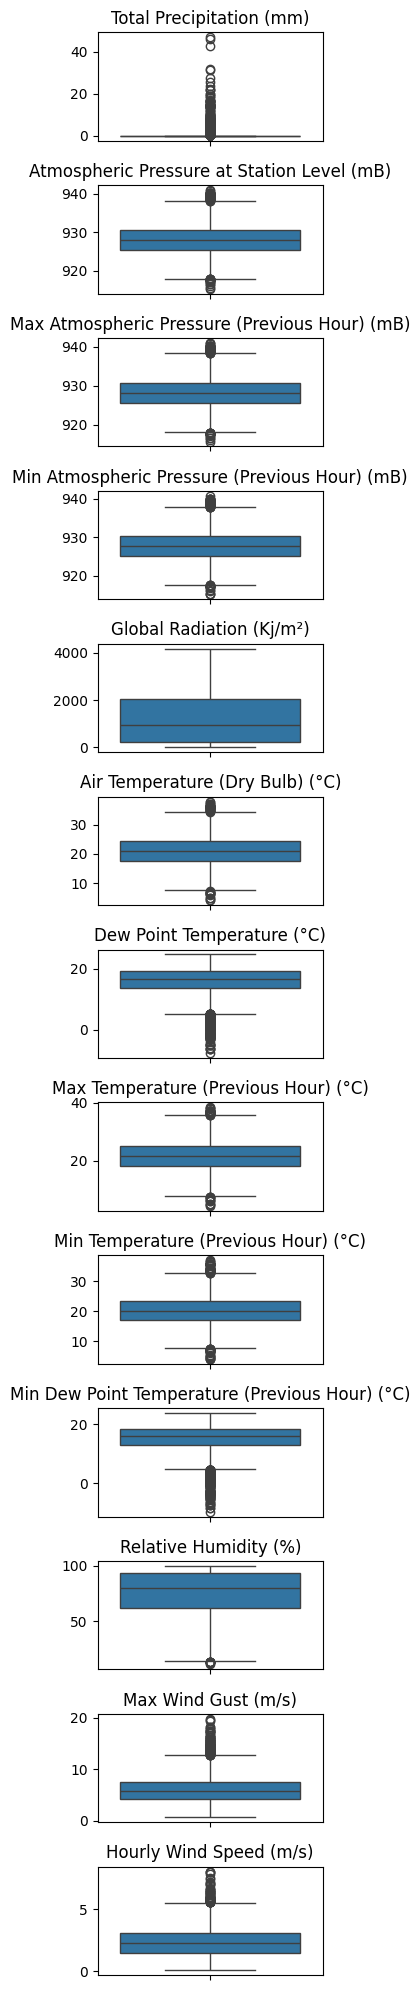

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Listar as colunas numéricas traduzidas para o inglês
numeric_columns = {
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Total Precipitation (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Atmospheric Pressure at Station Level (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Max Atmospheric Pressure (Previous Hour) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Min Atmospheric Pressure (Previous Hour) (mB)',
    'RADIACAO GLOBAL (Kj/m²)': 'Global Radiation (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'Air Temperature (Dry Bulb) (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'Dew Point Temperature (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'Max Temperature (Previous Hour) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'Min Temperature (Previous Hour) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'Min Dew Point Temperature (Previous Hour) (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Relative Humidity (%)',
    'VENTO, RAJADA MAXIMA (m/s)': 'Max Wind Gust (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Hourly Wind Speed (m/s)'
}

# Plotar boxplots para cada variável numérica
plt.figure(figsize=(3, 20))
for i, (portuguese, english) in enumerate(numeric_columns.items(), 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=dados_relevantes[portuguese])
    plt.title(english)
    plt.ylabel('')  # Remove o rótulo do eixo y
    plt.xlabel('')  # Remove o rótulo do eixo x para mais clareza se desejado
    plt.tight_layout()

plt.show()

In [30]:
# Realizar ANOVA para cada variável numérica em relação à classificação da chuva
anova_results = {}
for column in numeric_columns:
    groups = [dados_relevantes[dados_relevantes['Classificação Chuva'] == rain_type][column]
              for rain_type in dados_relevantes['Classificação Chuva'].unique()]
    anova_results[column] = stats.f_oneway(*groups)

# Mostrar os resultados da ANOVA
for column, result in anova_results.items():
    print(f'{column}: F-statistic = {result.statistic:.3f}, p-value = {result.pvalue:.3e}')


PRECIPITAÇÃO TOTAL, HORÁRIO (mm): F-statistic = 28350.227, p-value = 0.000e+00
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): F-statistic = 65.453, p-value = 5.132e-29
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB): F-statistic = 58.948, p-value = 3.235e-26
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB): F-statistic = 75.151, p-value = 3.479e-33
RADIACAO GLOBAL (Kj/m²): F-statistic = 105.793, p-value = 2.562e-46
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): F-statistic = 17.265, p-value = 3.248e-08
TEMPERATURA DO PONTO DE ORVALHO (°C): F-statistic = 67.988, p-value = 4.168e-30
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C): F-statistic = 5.177, p-value = 5.654e-03
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C): F-statistic = 10.047, p-value = 4.364e-05
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C): F-statistic = 61.964, p-value = 1.626e-27
UMIDADE RELATIVA DO AR, HORARIA (%): F-statistic = 137.540, p-value = 7.309e-60
VENTO, RAJADA MAXIMA (m/s): F-statistic = 27.894, p-value = 8.

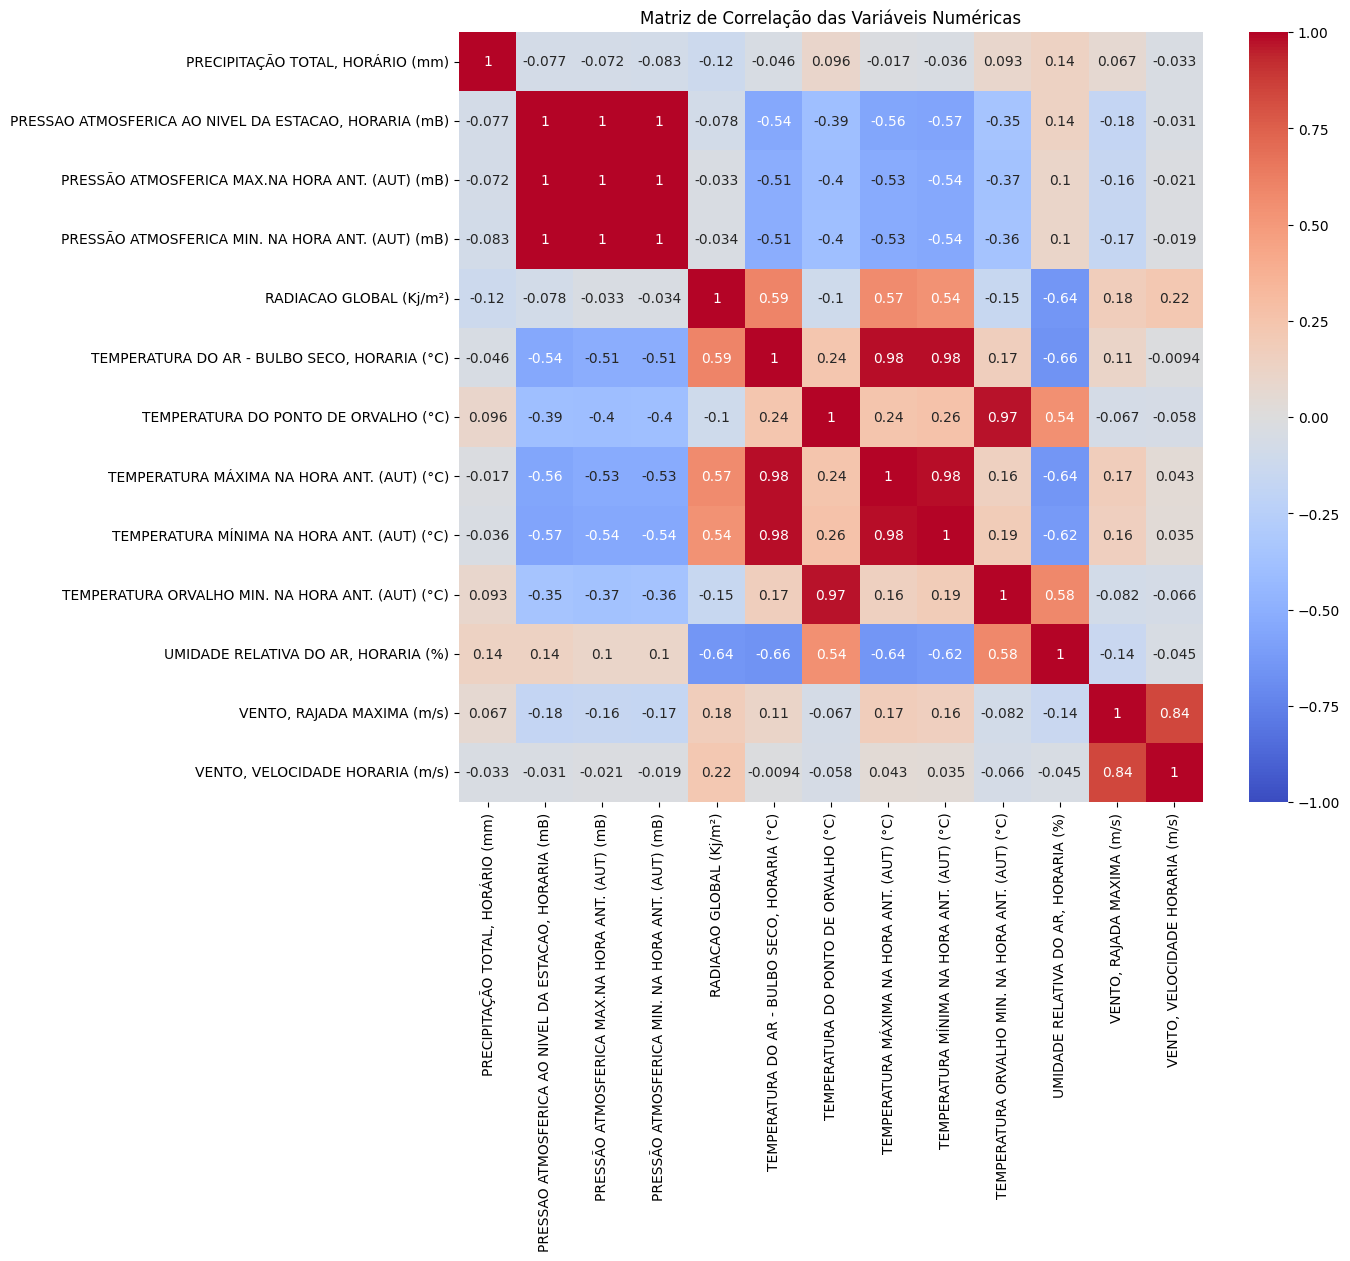

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
# Supondo que 'dados_relevantes' já está carregado como um DataFrame do pandas

# Listar as colunas numéricas
numeric_columns = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)'
]

# Calcular a matriz de correlação
correlation_matrix = dados_relevantes[numeric_columns].corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()



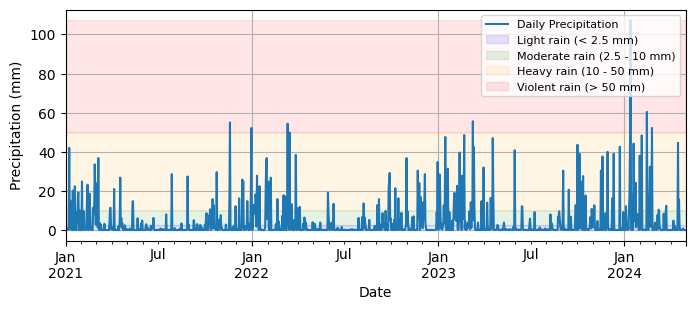

In [3]:
# Calcular a precipitação diária
precipitacao_diaria = dados_relevantes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].resample('D').sum()

# Renomear a série
precipitacao_diaria.rename('Daily Precipitation', inplace=True)

# Plotar a série temporal da precipitação diária
plt.figure(figsize=(8, 3))
precipitacao_diaria.plot()

# Adicionar áreas sombreadas para as categorias de precipitação
plt.fill_between(precipitacao_diaria.index, 0, 2.5, color='blue', alpha=0.1, label='Light rain (< 2.5 mm)')
plt.fill_between(precipitacao_diaria.index, 2.5, 10, color='green', alpha=0.1, label='Moderate rain (2.5 - 10 mm)')
plt.fill_between(precipitacao_diaria.index, 10, 50, color='orange', alpha=0.1, label='Heavy rain (10 - 50 mm)')
plt.fill_between(precipitacao_diaria.index, 50, max(precipitacao_diaria), color='red', alpha=0.1, label='Violent rain (> 50 mm)')

# Adicionar título e rótulos
#plt.title('Daily Precipitation with Rainfall Intensity Classification')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.legend(loc='upper right', fontsize=8)

# Mostrar o gráfico
plt.show()


In [4]:
# Definir a função de classificação
def classificar_chuva(intensidade):
    if intensidade < 2.5:
        return 'Chuva fraca'
    elif 2.5 <= intensidade < 10:
        return 'Chuva moderada'
    elif 10 <= intensidade < 50:
        return 'Chuva forte'
    elif intensidade >= 50:
        return 'Chuva violenta'
    else:
        return 'Sem dados'

In [5]:
# Aplicar a função de classificação e criar a nova coluna 'Classificação Chuva'
dados_relevantes['Classificação Chuva'] = dados_relevantes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].apply(classificar_chuva)

In [6]:
dados_relevantes['Classificação Chuva'].value_counts()

Classificação Chuva
Chuva fraca       28073
Sem dados           662
Chuva moderada      352
Chuva forte          97
Name: count, dtype: int64

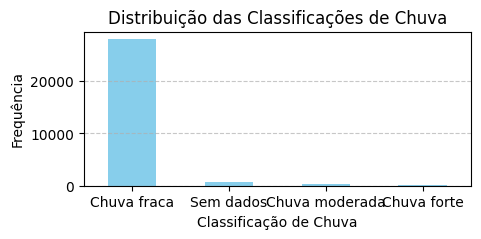

In [7]:
# Contar as ocorrências de cada classificação de chuva
contagem_classificacoes = dados_relevantes['Classificação Chuva'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(5, 2))
contagem_classificacoes.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Classificações de Chuva')
plt.xlabel('Classificação de Chuva')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
# Adicionar uma coluna indicando a semana do ano, corrigindo para a semana 53
dados_relevantes['Semana do Ano'] = dados_relevantes.index.isocalendar().week
dados_relevantes.loc[dados_relevantes['Semana do Ano'] == 53, 'Semana do Ano'] = 1

In [9]:
variaveis_relevantes = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)',
    'Classificação Chuva'
]

# Criar um novo DataFrame com as variáveis relevantes
dados_relevantes = dados_relevantes[variaveis_relevantes]



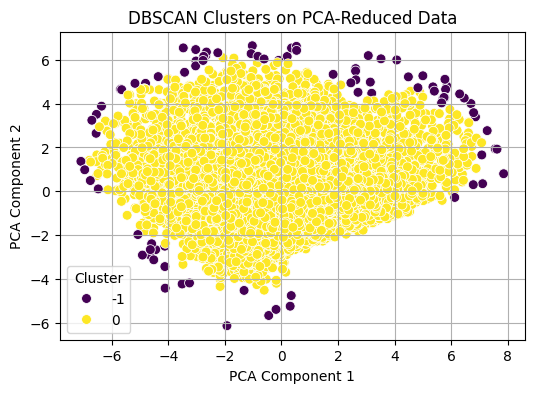

Explained variance ratio by PCA components: [0.40303366 0.23464469]


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Extrair os dados numéricos
dados_numericos = dados_relevantes[colunas_numericas]

# Imputar valores ausentes
imputer = SimpleImputer(strategy='mean')
dados_imputados = imputer.fit_transform(dados_numericos)

# Normalizar os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_imputados)

# Aplicar PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
dados_pca = pca.fit_transform(dados_normalizados)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=9)  # Parâmetros podem ser ajustados
clusters = dbscan.fit_predict(dados_pca)

# Adicionar os resultados ao DataFrame original
dados_relevantes['Cluster'] = clusters

# Plotar os resultados do PCA com os clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=dados_pca[:, 0], y=dados_pca[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('DBSCAN Clusters on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Exibir a explicação da variância do PCA
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


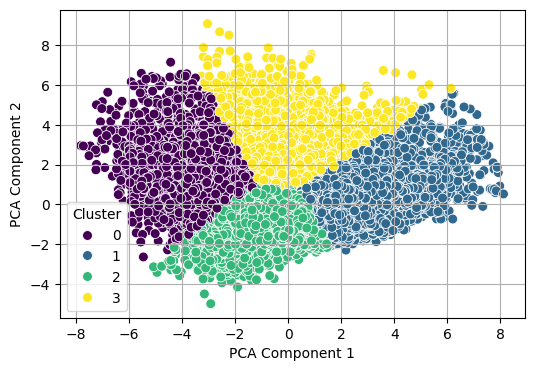

Explained variance ratio by PCA components: [0.40641883 0.22081618]


In [12]:
from sklearn.cluster import KMeans

# Aplicar KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Defina o número de clusters desejado
clusters = kmeans.fit_predict(dados_pca)

# Adicionar os resultados ao DataFrame original
dados_relevantes['Cluster'] = clusters

# Plotar os resultados do PCA com os clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=dados_pca[:, 0], y=dados_pca[:, 1], hue=clusters, palette='viridis', s=50)
#plt.title('KMeans Clusters on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Exibir a explicação da variância do PCA
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf


# **Investigando sem dados de preciptação**

# **PCA e grid**

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


# Eliminar valores ausentes
dados_relevantes = dados_relevantes.dropna()

# Separar variáveis independentes (X) e a variável dependente (y)
X = dados_relevantes.drop(['Classificação Chuva', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], axis=1)
y = dados_relevantes['Classificação Chuva']

# Codificar a variável alvo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizar os dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Balancear as classes com SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_bal)
X_test_pca = pca.transform(X_test)

# Função para realizar Grid Search e avaliar um modelo com validação cruzada
def grid_search_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")

    y_pred_test = best_model.predict(X_test)
    print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
    return best_model

# Definindo os parâmetros de Grid Search para cada modelo
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}

# Logistic Regression
print("Logistic Regression:")
lr_model = LogisticRegression()
best_lr_model = grid_search_and_evaluate_model(lr_model, param_grid_lr, X_train_pca, y_train_bal, X_test_pca, y_test)

# Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_model = RandomForestClassifier()
best_rf_model = grid_search_and_evaluate_model(rf_model, param_grid_rf, X_train_pca, y_train_bal, X_test_pca, y_test)

# Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM):")
svm_model = SVC()
best_svm_model = grid_search_and_evaluate_model(svm_model, param_grid_svm, X_train_pca, y_train_bal, X_test_pca, y_test)

# Gradient Boosting Classifier
print("\nGradient Boosting Classifier:")
gb_model = GradientBoostingClassifier()
best_gb_model = grid_search_and_evaluate_model(gb_model, param_grid_gb, X_train_pca, y_train_bal, X_test_pca, y_test)


Logistic Regression:


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best hyperparameters: {'C': 10}
                precision    recall  f1-score   support

   Chuva forte       0.02      0.56      0.04        16
   Chuva fraca       1.00      0.75      0.85      4018
Chuva moderada       0.04      0.50      0.07        44

      accuracy                           0.74      4078
     macro avg       0.35      0.60      0.32      4078
  weighted avg       0.98      0.74      0.84      4078

Test Accuracy: 0.7449730259931339

Random Forest Classifier:
Best hyperparameters: {'max_depth': None, 'n_estimators': 100}
                precision    recall  f1-score   support

   Chuva forte       0.02      0.44      0.04        16
   Chuva fraca       0.99      0.81      0.89      4018
Chuva moderada       0.03      0.32      0.05        44

      accuracy                           0.81      4078
     macro avg       0.35      0.52      0.33      4078
  weighted avg       0.98      0.81      0.88      4078

Test Accuracy: 0.8070132417851889

Support Vector Mach

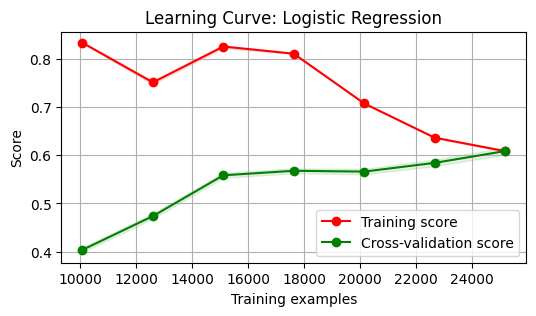

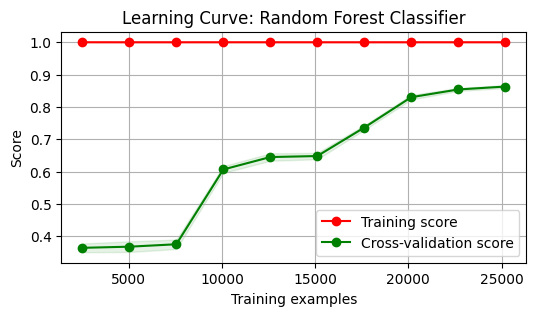

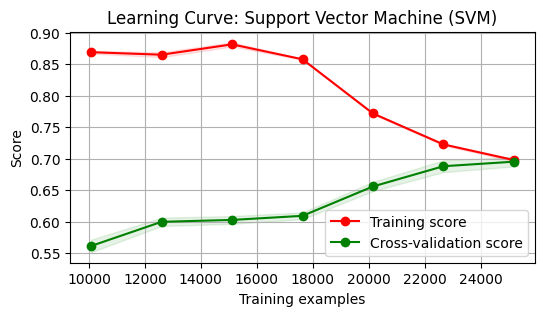

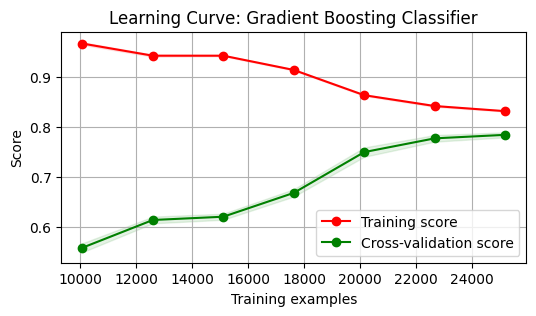

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Função para plotar curvas de aprendizado
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(6, 3))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plotar curvas de aprendizado para cada modelo otimizado

# Logistic Regression
plot_learning_curve(best_lr_model, X_train_pca, y_train_bal, "Learning Curve: Logistic Regression")

# Random Forest Classifier
plot_learning_curve(best_rf_model, X_train_pca, y_train_bal, "Learning Curve: Random Forest Classifier")

# Support Vector Machine (SVM)
plot_learning_curve(best_svm_model, X_train_pca, y_train_bal, "Learning Curve: Support Vector Machine (SVM)")

# Gradient Boosting Classifier
plot_learning_curve(best_gb_model, X_train_pca, y_train_bal, "Learning Curve: Gradient Boosting Classifier")


Logistic Regression:
Best hyperparameters: {'C': 10}
                precision    recall  f1-score   support

   Chuva forte       0.02      0.56      0.04        16
   Chuva fraca       1.00      0.75      0.85      4018
Chuva moderada       0.04      0.50      0.07        44

      accuracy                           0.74      4078
     macro avg       0.35      0.60      0.32      4078
  weighted avg       0.98      0.74      0.84      4078

Test Accuracy: 0.7449730259931339

Random Forest Classifier:
Best hyperparameters: {'max_depth': None, 'n_estimators': 300}
                precision    recall  f1-score   support

   Chuva forte       0.02      0.38      0.04        16
   Chuva fraca       0.99      0.82      0.90      4018
Chuva moderada       0.03      0.34      0.06        44

      accuracy                           0.81      4078
     macro avg       0.35      0.51      0.33      4078
  weighted avg       0.98      0.81      0.88      4078

Test Accuracy: 0.810446297204512


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best hyperparameters: {'learning_rate': 0.2, 'n_estimators': 300}
                precision    recall  f1-score   support

   Chuva forte       0.03      0.75      0.05        16
   Chuva fraca       0.99      0.77      0.87      4018
Chuva moderada       0.04      0.43      0.07        44

      accuracy                           0.76      4078
     macro avg       0.35      0.65      0.33      4078
  weighted avg       0.98      0.76      0.85      4078

Test Accuracy: 0.7645904855321236


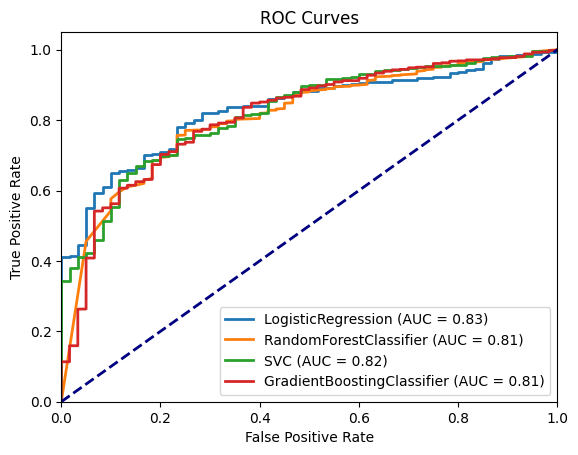

                        Model  Precision (Mean)  Precision (Std)  \
0          LogisticRegression          0.610763         0.005874   
1      RandomForestClassifier          0.868960         0.005339   
2                         SVC          0.729832         0.011919   
3  GradientBoostingClassifier          0.798113         0.007868   

   Recall (Mean)  Recall (Std)  F1-Score (Mean)  F1-Score (Std)  \
0       0.609098      0.006697         0.609503        0.006396   
1       0.865758      0.005471         0.865505        0.005524   
2       0.696563      0.010940         0.702524        0.011072   
3       0.786608      0.008266         0.787906        0.008066   

   Accuracy (Mean)  Accuracy (Std)  
0         0.609081        0.005674  
1         0.865788        0.005540  
2         0.696567        0.010857  
3         0.786624        0.008219  


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE


# Eliminar valores ausentes
dados_relevantes = dados_relevantes.dropna()

# Separar variáveis independentes (X) e a variável dependente (y)
X = dados_relevantes.drop(['Classificação Chuva', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], axis=1)
y = dados_relevantes['Classificação Chuva']

# Codificar a variável alvo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizar os dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Balancear as classes com SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_bal)
X_test_pca = pca.transform(X_test)

# Função para realizar Grid Search e avaliar um modelo com validação cruzada
def grid_search_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")

    y_pred_test = best_model.predict(X_test)
    print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
    return best_model

# Definindo os parâmetros de Grid Search para cada modelo
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}

# Logistic Regression
print("Logistic Regression:")
lr_model = LogisticRegression()
best_lr_model = grid_search_and_evaluate_model(lr_model, param_grid_lr, X_train_pca, y_train_bal, X_test_pca, y_test)

# Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_model = RandomForestClassifier()
best_rf_model = grid_search_and_evaluate_model(rf_model, param_grid_rf, X_train_pca, y_train_bal, X_test_pca, y_test)

# Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM):")
svm_model = SVC(probability=True)  # ensure probability=True for ROC
best_svm_model = grid_search_and_evaluate_model(svm_model, param_grid_svm, X_train_pca, y_train_bal, X_test_pca, y_test)

# Gradient Boosting Classifier
print("\nGradient Boosting Classifier:")
gb_model = GradientBoostingClassifier()
best_gb_model = grid_search_and_evaluate_model(gb_model, param_grid_gb, X_train_pca, y_train_bal, X_test_pca, y_test)

# Função para calcular as métricas e plotar a curva ROC
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Validação cruzada para métricas
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    precision, recall, f1, accuracy = [], [], [], []
    for train_idx, val_idx in cv.split(X_train):
        X_t, X_v = X_train[train_idx], X_train[val_idx]
        y_t, y_v = y_train[train_idx], y_train[val_idx]
        model.fit(X_t, y_t)
        y_pred = model.predict(X_v)
        p, r, f, _ = precision_recall_fscore_support(y_v, y_pred, average='macro')
        a = accuracy_score(y_v, y_pred)
        precision.append(p)
        recall.append(r)
        f1.append(f)
        accuracy.append(a)

    # Treinar o modelo e prever no conjunto de teste
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Plotar curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Retornar métricas de validação cruzada e dados para ROC
    return {
        'Model': model.__class__.__name__,
        'Precision': (np.mean(precision), np.std(precision)),
        'Recall': (np.mean(recall), np.std(recall)),
        'F1-Score': (np.mean(f1), np.std(f1)),
        'Accuracy': (np.mean(accuracy), np.std(accuracy)),
        'FPR': fpr,
        'TPR': tpr,
        'AUC': roc_auc
    }

# Avaliar e plotar curvas ROC para cada modelo otimizado
metrics_lr = evaluate_model(best_lr_model, X_train_pca, y_train_bal, X_test_pca, y_test)
metrics_rf = evaluate_model(best_rf_model, X_train_pca, y_train_bal, X_test_pca, y_test)
metrics_svm = evaluate_model(best_svm_model, X_train_pca, y_train_bal, X_test_pca, y_test)
metrics_gb = evaluate_model(best_gb_model, X_train_pca, y_train_bal, X_test_pca, y_test)

# Plotar curvas ROC sobrepostas
plt.figure()
for metrics in [metrics_lr, metrics_rf, metrics_svm, metrics_gb]:
    plt.plot(metrics['FPR'], metrics['TPR'], lw=2, label=f'{metrics["Model"]} (AUC = {metrics["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

# Exibir as métricas em uma tabela
metrics_df = pd.DataFrame([metrics_lr, metrics_rf, metrics_svm, metrics_gb])
metrics_df[['Precision Mean', 'Precision Std']] = pd.DataFrame(metrics_df['Precision'].tolist(), index=metrics_df.index)
metrics_df[['Recall Mean', 'Recall Std']] = pd.DataFrame(metrics_df['Recall'].tolist(), index=metrics_df.index)
metrics_df[['F1-Score Mean', 'F1-Score Std']] = pd.DataFrame(metrics_df['F1-Score'].tolist(), index=metrics_df.index)
metrics_df[['Accuracy Mean', 'Accuracy Std']] = pd.DataFrame(metrics_df['Accuracy'].tolist(), index=metrics_df.index)
metrics_df = metrics_df.drop(columns=['Precision', 'Recall', 'F1-Score', 'Accuracy', 'FPR', 'TPR', 'AUC'])

metrics_df = metrics_df.rename(columns={'Model': 'Model',
                                        'Precision Mean': 'Precision (Mean)', 'Precision Std': 'Precision (Std)',
                                        'Recall Mean': 'Recall (Mean)', 'Recall Std': 'Recall (Std)',
                                        'F1-Score Mean': 'F1-Score (Mean)', 'F1-Score Std': 'F1-Score (Std)',
                                        'Accuracy Mean': 'Accuracy (Mean)', 'Accuracy Std': 'Accuracy (Std)'})

print(metrics_df)



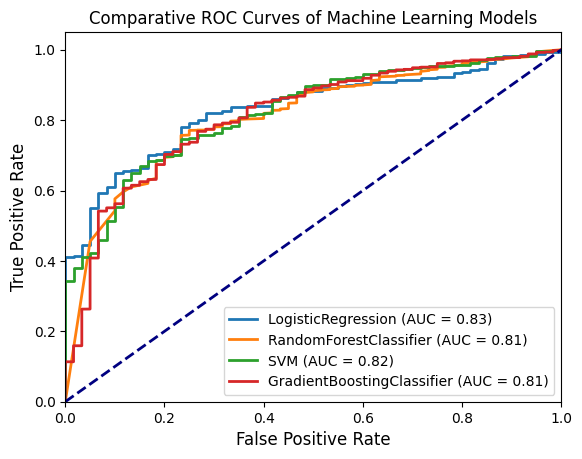

In [17]:
# Plotar curvas ROC sobrepostas
plt.figure()
for metrics in [metrics_lr, metrics_rf, metrics_svm, metrics_gb]:
    label = 'SVM' if metrics['Model'] == 'SVC' else metrics['Model']
    plt.plot(metrics['FPR'], metrics['TPR'], lw=2, label=f'{label} (AUC = {metrics["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Comparative ROC Curves of Machine Learning Models')
plt.legend(loc="lower right")
plt.show()

In [18]:
metrics_df

,Model,Precision (Mean),Precision (Std),Recall (Mean),Recall (Std),F1-Score (Mean),F1-Score (Std),Accuracy (Mean),Accuracy (Std)
0,LogisticRegression,0.610763,0.005874,0.609098,0.006697,0.609503,0.006396,0.609081,0.005674
1,RandomForestClassifier,0.868960,0.005339,0.865758,0.005471,0.865505,0.005524,0.865788,0.005540
2,SVC,0.729832,0.011919,0.696563,0.010940,0.702524,0.011072,0.696567,0.010857
3,GradientBoostingClassifier,0.798113,0.007868,0.786608,0.008266,0.787906,0.008066,0.786624,0.008219
